<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Korelasi_Bahan_bakar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sakti Kusuma AJi | 22.11.4677

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Definisikan format missing values yang mungkin ada
missing_value_format = ['N.A', 'na', 'n.a.', 'n/a', '?', '-']

# Load dataset
df = pd.read_csv('/content/fuel.csv', header=None, na_values=missing_value_format, encoding='latin-1')
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
5,2024,Acura,RDX SH-AWD,Sport utility vehicle: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
6,2024,Acura,RDX SH-AWD A-SPEC,Sport utility vehicle: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,241,5,6
7,2024,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,Z,10.0,7.2,8.7,32,205,5,5
8,2024,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,Z,10.5,7.7,9.2,31,217,5,5
9,2024,Alfa Romeo,Giulia Quadrifoglio,Mid-size,2.9,6,A8,Z,13.5,9.3,11.6,24,271,4,3


In [ ]:
# Membuat list nama kolom
column_names = ['Model year', 'Make', 'Model', 'Vehicle class	', 'Engine size (L)	', 'Cylinders', 'Transmission',
              'Fuel type', 'City (L/100 km)', 'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)', 'CO2 emissions (g/km)', 'CO2 rating', 'Smog rating']

# Mengubah nama kolom
df.columns = column_names

pd.set_option('display.max_columns', 100)     # Menampilkan seluruh kolom
df.head()

,Model year,Make,Model,Vehicle class\t,Engine size (L)\t,Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [ ]:
# Cek info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            764 non-null    int64  
 1   Make                  764 non-null    object 
 2   Model                 764 non-null    object 
 3   Vehicle class	        764 non-null    object 
 4   Engine size (L)	      764 non-null    float64
 5   Cylinders             764 non-null    int64  
 6   Transmission          764 non-null    object 
 7   Fuel type             764 non-null    object 
 8   City (L/100 km)       764 non-null    float64
 9   Highway (L/100 km)    764 non-null    float64
 10  Combined (L/100 km)   764 non-null    float64
 11  Combined (mpg)        764 non-null    int64  
 12  CO2 emissions (g/km)  764 non-null    int64  
 13  CO2 rating            764 non-null    int64  
 14  Smog rating           764 non-null    int64  
dtypes: float64(4), int64(6)

In [ ]:
df.describe()

,Model year,Engine size (L)\t,Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,764.0,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,2024.0,3.078010,5.534031,12.395550,9.425393,11.060079,27.361257,258.920157,4.484293,5.494764
std,0.0,1.264461,1.892288,3.394191,2.307174,2.847954,7.718533,64.954103,1.305705,1.609677
min,2024.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2024.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,210.000000,4.000000,5.000000
50%,2024.0,2.900000,6.000000,12.200000,9.300000,10.950000,26.000000,260.000000,4.000000,6.000000
75%,2024.0,3.600000,6.000000,14.500000,10.800000,12.725000,31.000000,299.000000,5.000000,7.000000
max,2024.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,8.000000,8.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


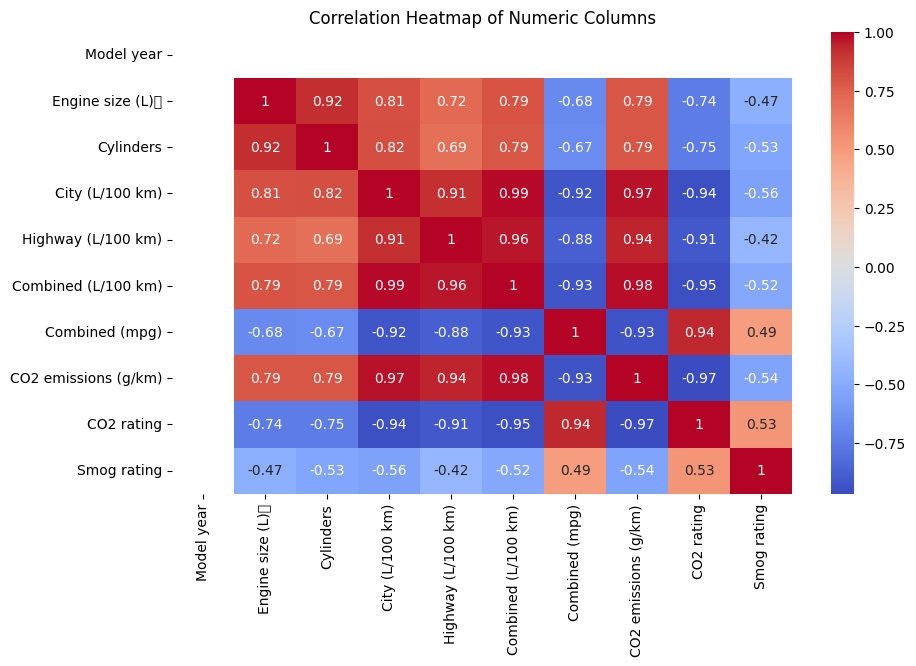

In [ ]:
# Assuming df is your DataFrame as defined in your info()
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix for numeric columns
corr_matrix = df[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

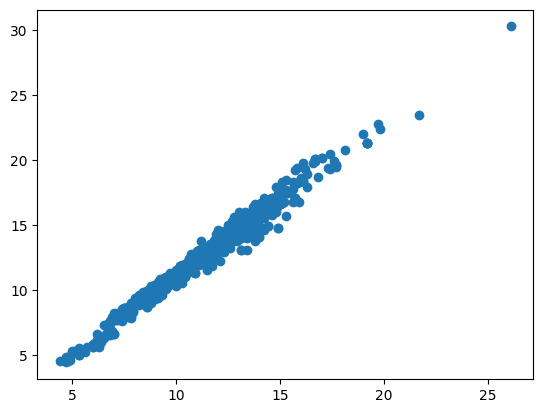

In [ ]:
# Scatter plot kolom 'price' dan 'horsepower'

plt.scatter(df['Combined (L/100 km)'], df['City (L/100 km)'])
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


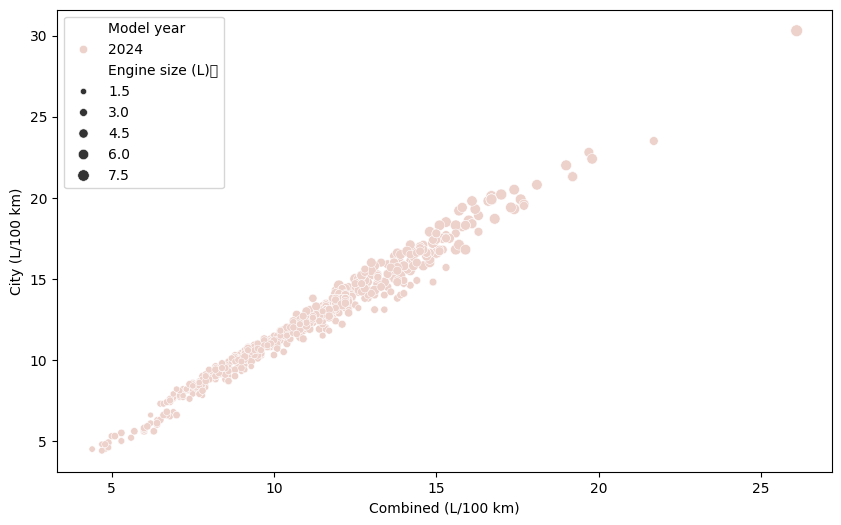

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x='Combined (L/100 km)', y='City (L/100 km)', hue='Model year', size='Engine size (L)\t')
plt.show()

<ipython-input-37-aa2ab1c78b59>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cylinders', data=df, palette='Set2', ax=ax0)
<ipython-input-37-aa2ab1c78b59>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smog rating', data=df, palette='Set2', ax=ax1)


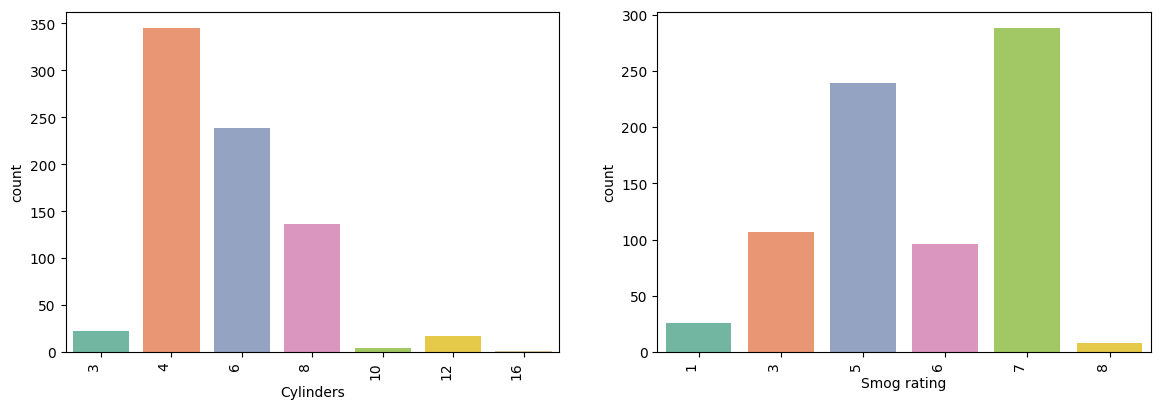

In [ ]:
# Menampilkan countplot dari 'make' dan 'body-style'

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 5))

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0])
ax1 = fig.add_subplot(ax[1])

sns.countplot(x='Cylinders', data=df, palette='Set2', ax=ax0)
sns.countplot(x='Smog rating', data=df, palette='Set2', ax=ax1)

fig.autofmt_xdate(rotation=90)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

In [ ]:
df_features = df.drop('Smog rating', axis=1)
df_target = df['Smog rating']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Select only numeric columns for scaling
df_features = df[numeric_columns]

# Scale the numeric columns
scaler = StandardScaler()
df_features_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

df_scaled = pd.concat([df[['Make', 'Model']], df_features_scaled], axis=1)

# Display the scaled DataFrame
df_scaled.head()


,Make,Model,Model year,Engine size (L)\t,Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,Acura,Integra A-SPEC,0.0,-1.248789,-0.811207,-1.266388,-1.268786,-1.286003,1.379241,-1.339055,1.161595,0.935729
1,Acura,Integra A-SPEC,0.0,-1.248789,-0.811207,-1.030537,-1.268786,-1.145459,1.119954,-1.200405,1.161595,0.314080
2,Acura,Integra Type S,0.0,-0.853104,-0.811207,-0.381946,-0.488099,-0.407604,0.212452,-0.445532,0.395223,0.314080
3,Acura,MDX SH-AWD,0.0,0.333949,0.246407,0.060275,-0.011013,0.049163,-0.306121,0.062852,-0.371149,-0.307570
4,Acura,MDX SH-AWD Type S,0.0,-0.061735,0.246407,0.414052,0.769673,0.470794,-0.565407,0.494208,-0.371149,-0.307570


In [ ]:
from sklearn.preprocessing import StandardScaler

cols = list(df_features.columns)

df_features_scaled = pd.DataFrame(data = df_features)
df_features_scaled[cols] = StandardScaler().fit_transform(df_features[cols])
df_features_scaled.head()

,Model year,Engine size (L)\t,Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,0.0,-1.248789,-0.811207,-1.266388,-1.268786,-1.286003,1.379241,-1.339055,1.161595,0.935729
1,0.0,-1.248789,-0.811207,-1.030537,-1.268786,-1.145459,1.119954,-1.200405,1.161595,0.314080
2,0.0,-0.853104,-0.811207,-0.381946,-0.488099,-0.407604,0.212452,-0.445532,0.395223,0.314080
3,0.0,0.333949,0.246407,0.060275,-0.011013,0.049163,-0.306121,0.062852,-0.371149,-0.307570
4,0.0,-0.061735,0.246407,0.414052,0.769673,0.470794,-0.565407,0.494208,-0.371149,-0.307570


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data dengan train test split
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, df_target, test_size=0.2, random_state=45)

In [ ]:
# Menampilkan data X_train dan X_test

print('Train set:', X_train.shape,  y_train.shape)
print(X_train.head())
print('\n')
print('Test set:', X_test.shape,  y_test.shape)
print(X_test.head())

Train set: (611, 10) (611,)
     Model year  Engine size (L)\t  Cylinders  City (L/100 km)  \
146         0.0           0.413086   0.246407         0.561459   
644         0.0          -0.061735   0.246407         0.679384   
327         0.0          -0.853104  -0.811207        -1.354833   
503         0.0          -0.457420  -0.811207        -0.676760   
210         0.0           2.470646   1.304021         2.389306   

     Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
146           -0.184499             0.295114       -0.435764   
644            0.335959             0.576202       -0.695050   
327           -1.355529            -1.391410        1.638527   
503           -0.921814            -0.794100        0.601381   
210            1.897331             2.227590       -1.472909   

     CO2 emissions (g/km)  CO2 rating  Smog rating  
146              0.324747   -0.371149     0.314080  
644              0.571236   -0.371149    -0.307570  
327             -1.446894    1.

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Menampilkan koefisien

lr_model.coef_

array([ 0.00000000e+00, -3.33066907e-16, -8.46545056e-16,  2.05391260e-15,
        4.78783679e-16, -2.95596880e-15, -2.77555756e-17,  1.20736754e-15,
        1.52655666e-16,  1.60862330e+00])

In [ ]:
# Menampilkan intercept

lr_model.intercept_

5.494764397905759

In [ ]:
# Menguji model

y_pred = lr_model.predict(X_test)
y_pred

array([3., 5., 7., 5., 5., 7., 3., 3., 7., 7., 5., 5., 3., 1., 5., 5., 3.,
       6., 6., 5., 7., 7., 6., 7., 7., 5., 6., 1., 7., 5., 7., 6., 3., 5.,
       3., 7., 7., 7., 1., 5., 5., 6., 7., 5., 7., 7., 3., 3., 7., 7., 7.,
       5., 7., 5., 8., 7., 5., 7., 6., 7., 3., 7., 5., 6., 5., 5., 3., 6.,
       5., 6., 3., 7., 3., 7., 5., 5., 7., 3., 5., 6., 7., 7., 5., 6., 7.,
       6., 5., 7., 7., 5., 5., 7., 3., 7., 7., 1., 7., 7., 6., 6., 7., 5.,
       5., 5., 7., 7., 7., 7., 5., 5., 3., 7., 5., 1., 5., 7., 7., 3., 5.,
       7., 7., 7., 7., 5., 6., 6., 7., 5., 5., 5., 7., 5., 7., 7., 7., 7.,
       6., 6., 7., 3., 5., 5., 5., 5., 3., 5., 6., 5., 6., 7., 5., 5., 7.])

In [ ]:
from sklearn.metrics import r2_score

# Menampilkan nilai r2 score
print("R2-score: %.2f" % r2_score(y_pred, y_test))

R2-score: 1.00
